# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether a person will default on their loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 

Dataset: The dataset comes customers default payments in Taiwan. More information about the dataset and columns are found in the link below.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#


You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

#### You will be working in pairs for this assessment; please have ONE notebook and be prepared to explain how you worked in your pair.
1. Clean up your data set so that you can do EDA. This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Create polynomial and/or interaction features. You must also create at least 2 new features that are not interactions or polynomial transformations. For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.
4. Perform some feature selction. This can happen beforehand using F-scores, or you can do it as part of your model building process by looking at the weights of your regularized logistic regression or feature importance of your decision tree.  
5. You must fit each of the three models to your data and tune at least 1 hyperparameter per model. 
6. After identifying the best hyperparameters for each model, fit those models to the test set and identify the best model overall using the evaluation metric of your choice.
7. Present your best model.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Cleaning

In [2]:
df = pd.read_excel('credit_card_default.xls')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
#rename columns
df.columns = df.iloc[0].values

In [4]:
#drop row with column names
df.drop(0, axis=0, inplace=True)

In [5]:
#drop ID coloumn because it has nothing to do with predicting the target variable, 'default payment next month'
df.drop('ID', axis=1, inplace=True)

In [6]:
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [7]:
#check null values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
#check the type of the each column
df.dtypes

LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [9]:
# turn all objects to integers
df = df.apply(lambda col: pd.to_numeric(col, errors='ignore'))
#turn columns LIMIT_BAL and AGE to numerics
# df.LIMIT_BAL = pd.to_numeric(df['LIMIT_BAL'], errors='ignore')
# df.AGE = pd.to_numeric(df['AGE'], errors='ignore')

In [10]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


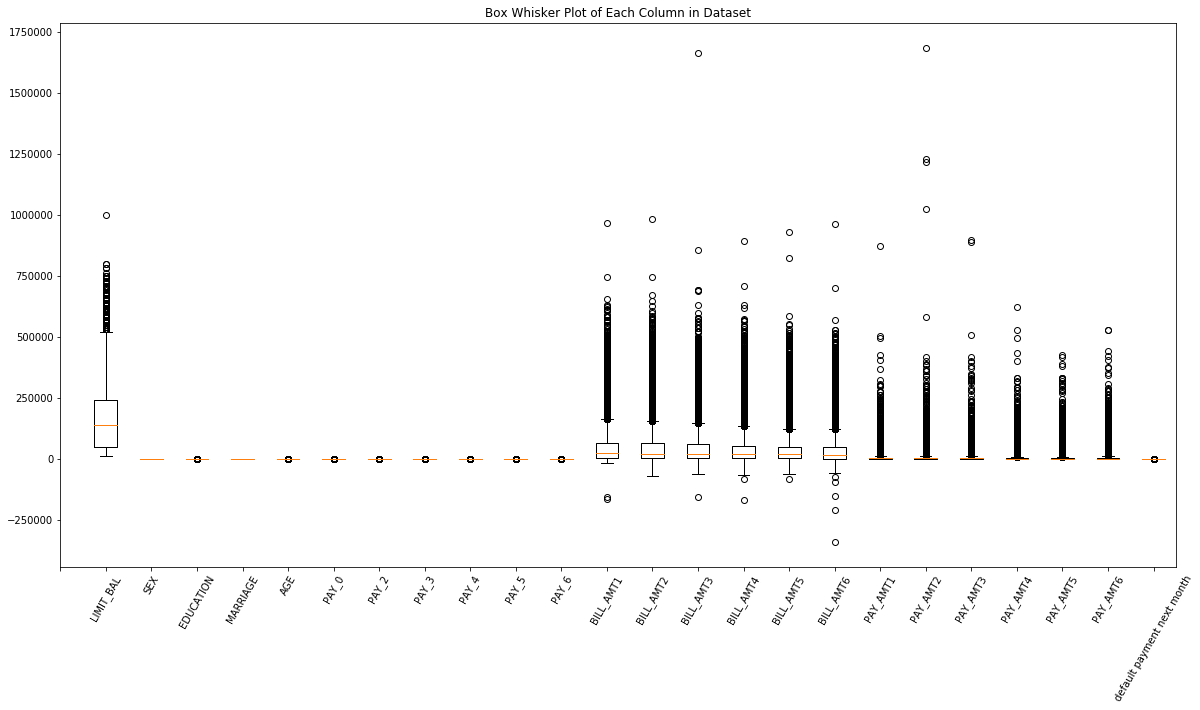

In [11]:
display(df.describe())

# Create a Box Whisker Plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box Whisker Plot of Each Column in Dataset")
plt.xticks(range(len(df.columns.values)+1), ['']+list(df.columns.values), rotation=60)
plt.show()

In [12]:
#we can remove datapoints with a LIMIT_BAL above 750,000 as there are many outliers for that column and many other columns

print('old shape: ', df[df.LIMIT_BAL > 750000].shape)

df = df[df.LIMIT_BAL < 750000]
print('new shape: ', df.shape)

old shape:  (6, 24)
new shape:  (29990, 24)


In [13]:
#we also do not care how big a bill was or how much of it was paided off. We can remove those columns
drop_cols = df.loc[:,'BILL_AMT1':'PAY_AMT6'].columns
df.drop(drop_cols, axis=1, inplace=True)

In [14]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,1
2,120000,2,2,2,26,-1,2,0,0,0,2,1
3,90000,2,2,2,34,0,0,0,0,0,0,0
4,50000,2,2,1,37,0,0,0,0,0,0,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,0


In [15]:
# marital status can only be 1,2 or 3 -> can't be 0, drop those
drop_ind = df[df.MARRIAGE == 0].index
df.drop(drop_ind, axis=0, inplace=True)

In [16]:
# Education can only be 1,2,3,4 -> can't be anything greater, drop those
drop_ind = df[df.EDUCATION > 4].index
df.drop(drop_ind, axis=0, inplace=True)

In [17]:
# col = df['PAY_0']
# df.loc[col >= 0] =1
# df.loc[col < 0] =0

In [18]:
# df.head()

In [19]:
#function to turn the repayment values in the repayment columns to repayed on time or not
def repay_status_conv(col):
    # all who have delayed payments are given a 1
    df.loc[df[col] > 0, col] = 1
    # all who made payments early or on time are given a 0
    df.loc[df[col] <= 0, col] = 0
    


In [20]:
#replace the repayment values in columns PAY_0 to PAY_6
repay_col = list(df.loc[:,'PAY_0':'PAY_6'].columns)
for col in repay_col:
    repay_status_conv(col)

In [21]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
1,20000,2,2,1,24,1,1,0,0,0,0,1
2,120000,2,2,2,26,0,1,0,0,0,1,1
3,90000,2,2,2,34,0,0,0,0,0,0,0
4,50000,2,2,1,37,0,0,0,0,0,0,0
5,50000,1,2,1,57,0,0,0,0,0,0,0


## 2. EDA

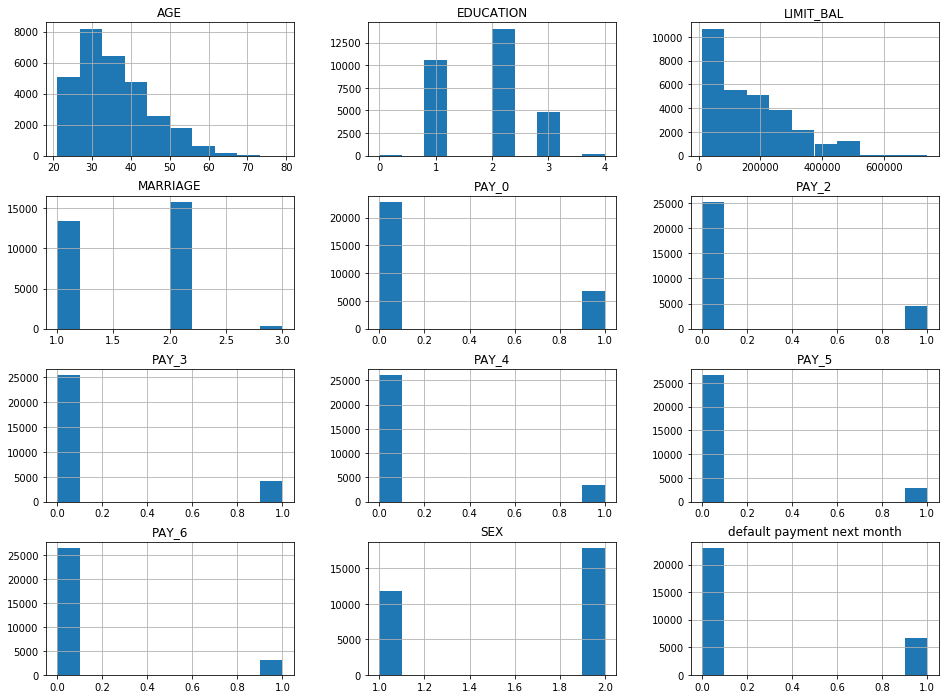

In [22]:
df.hist(figsize=(16,12))
plt.show()

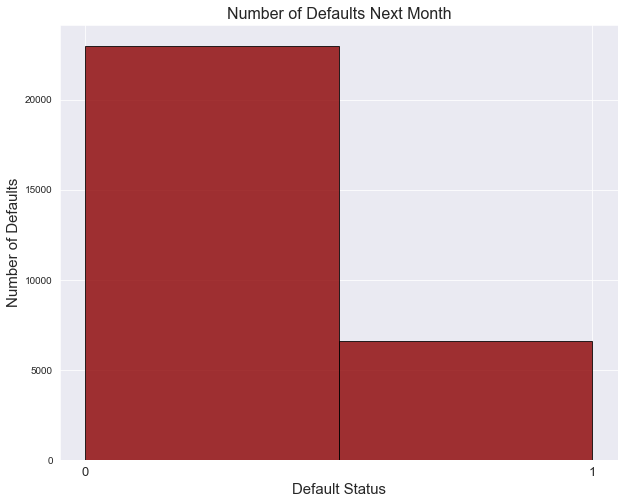

In [34]:
#Target Variable
plt.figure(figsize=(10,8))
df['default payment next month'].hist(bins=2,edgecolor='black', color='darkred', alpha=0.8)
plt.title('Number of Defaults Next Month', fontsize=16)
plt.ylabel('Number of Defaults',  fontsize=15)
plt.xlabel('Default Status', fontsize=15)
plt.xticks([0,1], fontsize=13)
plt.show()

```
Most wil Not default next month
```

In [24]:
def col_hist(ax, col, bins, color):
    ax.hist(df[col], bins=bins, alpha =0.7,edgecolor='black',color=color)
    ax.set_xlabel(col, fontsize = 15)
    ax.set_ylabel('Number of Customers',fontsize = 15)
    ax.set_title('Given Credit of Customers',fontsize = 17)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
count,29605.000000,29605.000000,29605.000000,29605.000000,29605.00000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000
mean,167363.069752,1.603108,1.814660,1.555616,35.46276,0.228441,0.149063,0.141665,0.118021,0.099916,0.103631,0.223104
std,129437.714210,0.489262,0.711299,0.518072,9.21188,0.419835,0.356156,0.348712,0.322638,0.299892,0.304787,0.416335
min,10000.000000,1.000000,0.000000,1.000000,21.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,740000.000000,2.000000,4.000000,3.000000,79.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


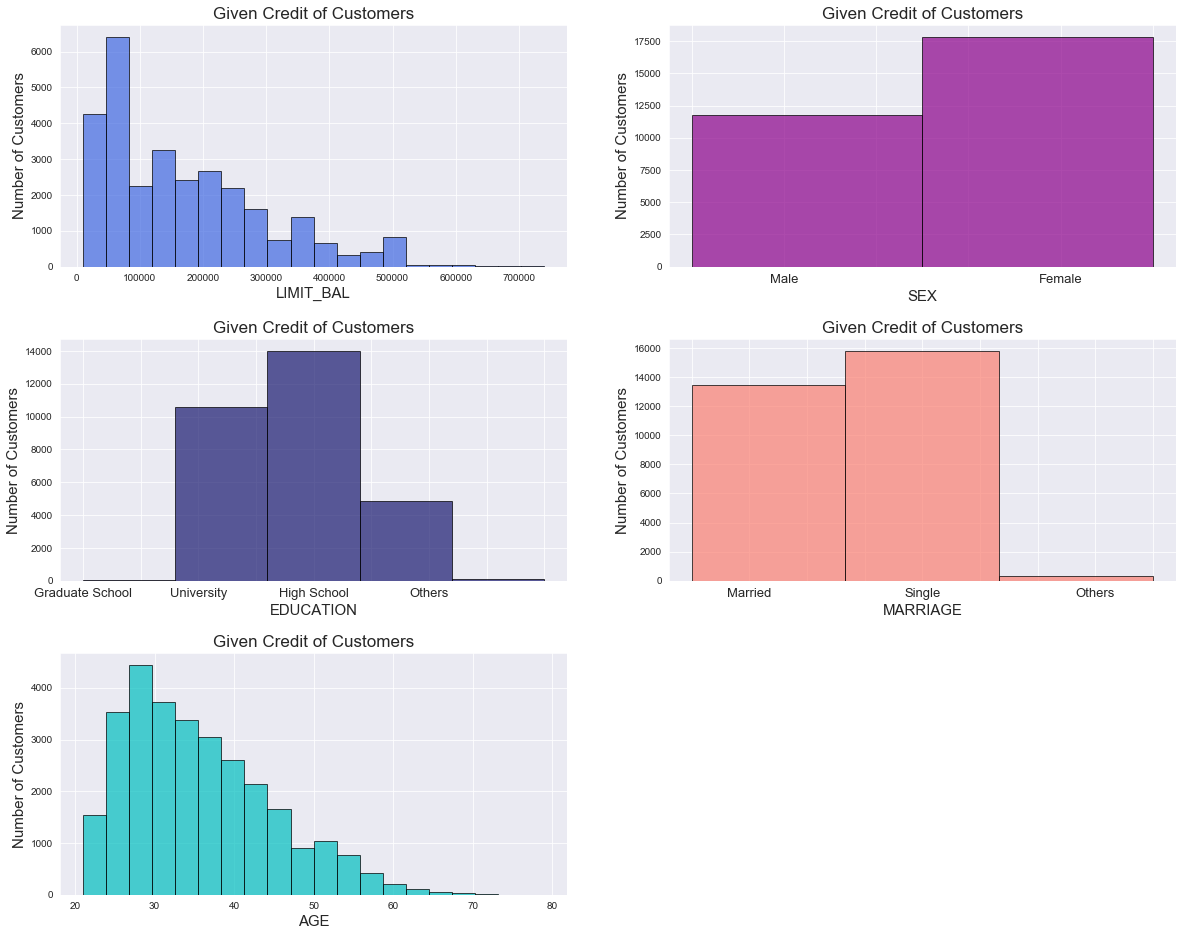

In [25]:
display(df.describe())
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
col_hist(ax1, 'LIMIT_BAL', 20, 'royalblue')

ax2 = fig.add_subplot(322)
col_hist(ax2, 'SEX', 2, 'darkmagenta')
ax2.set_xticklabels(['', '', 'Male', '', '', 'Female'], fontsize=13)


ax3 = fig.add_subplot(323)
col_hist(ax3, 'EDUCATION', 5, 'midnightblue')
ax3.set_xticklabels(['','Graduate School', '','University', '','High School','', 'Others'], fontsize=13)


ax4 = fig.add_subplot(324)
col_hist(ax4, 'MARRIAGE', 3, 'salmon')
ax4.set_xticklabels(['', '', 'Married', '','', 'Single', '','', 'Others'], fontsize=13)


ax5 = fig.add_subplot(325)
col_hist(ax5, 'AGE', 20, 'c')

plt.show()

- There are about an equal number of married customers to single customers
- Most customers were of people with higher education (i.e. Graduate School, University)
- Around 5000 more Female customers than Male customers
- The trend for LIMIT_BAL and AGE seems to be connected. There are many customers with a lower end LIMIT_BAL like 80,000 which would make sense as there are many customers around the lower end of age, around 27.




In [26]:
#function to make bar graph comparing columns with daulting status
def default_vs(col):
    print(df.groupby([col, 'default payment next month'])[col].count().unstack())

    parch = df.groupby([col, 'default payment next month'])[col].count().unstack()
    p3 = parch.plot(kind = 'bar', stacked = True,
                      color = ['steelblue', 'y'], alpha = .70)
    p3.set_title('Defaulted Status on {} of Customers'.format(col), fontsize=16)
    p3.set_xlabel(col, fontsize=15)
    p3.set_ylabel('Number of Customers', fontsize=15)
    p3.legend(['Will not Default','Will Default'])
    plt.show()

#### Default vs. Sex

default payment next month      0     1
SEX                                    
1                            8889  2861
2                           14111  3744


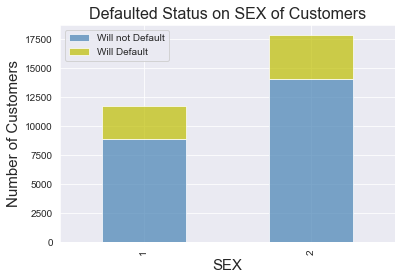

In [27]:
default_vs('SEX')
# 1=Male 2=Female

```
Even though there are more female customers than male customers, males have a higher chance of defaulting, around 32%, while females default around 26% of the time.
```

#### Default vs. Education

default payment next month        0       1
EDUCATION                                  
0                              14.0     NaN
1                            8540.0  2036.0
2                           10692.0  3329.0
3                            3638.0  1233.0
4                             116.0     7.0


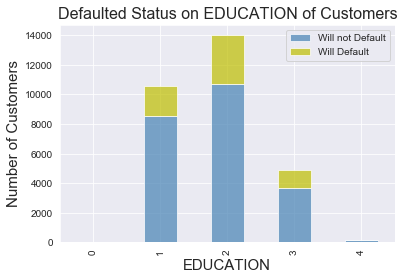

In [28]:
default_vs('EDUCATION')
# 1=Graduate School 2=University 3=High School 4=Others

In [29]:
stats = df.groupby(['EDUCATION', 'default payment next month']).EDUCATION.count().unstack()
stats[1]/stats[0]

EDUCATION
0         NaN
1    0.238407
2    0.311354
3    0.338922
4    0.060345
dtype: float64

- 23% of Grad School customers will default
- 31% of University customers will default
- 33% of High School customers will default
- 6% of other customers will default

#### Default vs. Marriage Status

default payment next month      0     1
MARRIAGE                               
1                           10282  3192
2                           12484  3329
3                             234    84


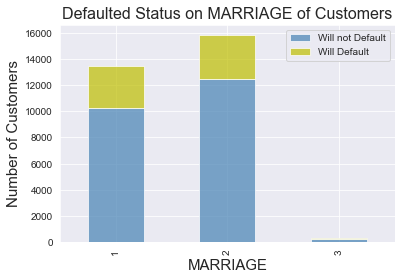

In [30]:
default_vs('MARRIAGE')
# 1=Married 2=Single 3=Others

In [31]:
stats = df.groupby(['MARRIAGE', 'default payment next month']).MARRIAGE.count().unstack()
stats[1]/stats[0]

MARRIAGE
1    0.310445
2    0.266661
3    0.358974
dtype: float64

- 31% of Married customers will default
- 26% of Single customers will default
- 35% of Other customers will default

The ratios seem the same. Makes me think that marriage won't be a good predictor for chance of default

#### AGE and LIMIT_BAL

In [32]:
def default_vs_cont(ax, col):
    ax.hist(df[df['default payment next month'] ==0][col], bins = 20, label ='Will Not Default', alpha = .50,edgecolor= 'black',color ='steelblue')
    ax.hist(df[df['default payment next month'] ==1][col], bins = 20, label = 'Will Default', alpha = .70, edgecolor = 'black',color = 'y')
    ax.set_title('Defaulted Status on {} of Customers'.format(col), fontsize=16)
    ax.set_xlabel(col, fontsize=15)
    ax.set_ylabel('Number of Customers', fontsize=15)

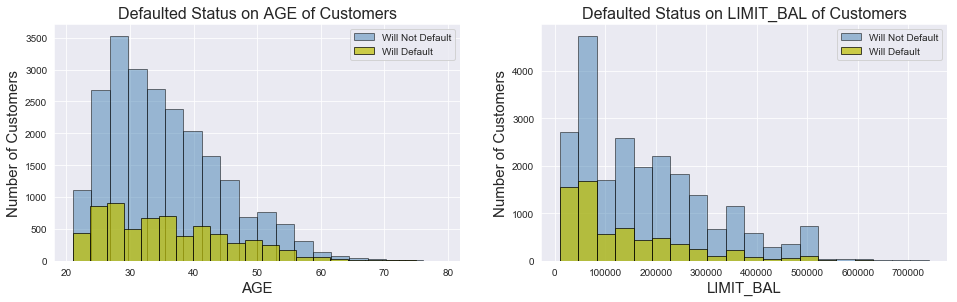

In [33]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

#plot age vs default
ax1 = fig.add_subplot(221)
default_vs_cont(ax1, 'AGE')
ax1.legend(loc = 'upper right')

#plot LIMIT_BAL vs default
ax2 = fig.add_subplot(222)
default_vs_cont(ax2, 'LIMIT_BAL')
ax2.legend(loc = 'upper right')

plt.show()

- most people will not default
- Those who have a LIMIT_BAL less than 100,000 defaulted the most out of those who defaulted in the LIMTI_BAL group
- Those who are around the age of 27 defaulted the most out of those who defaulted in the AGE group

#### repayment

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
count,29605.000000,29605.000000,29605.000000,29605.000000,29605.00000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000,29605.000000
mean,167363.069752,1.603108,1.814660,1.555616,35.46276,0.228441,0.149063,0.141665,0.118021,0.099916,0.103631,0.223104
std,129437.714210,0.489262,0.711299,0.518072,9.21188,0.419835,0.356156,0.348712,0.322638,0.299892,0.304787,0.416335
min,10000.000000,1.000000,0.000000,1.000000,21.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,740000.000000,2.000000,4.000000,3.000000,79.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


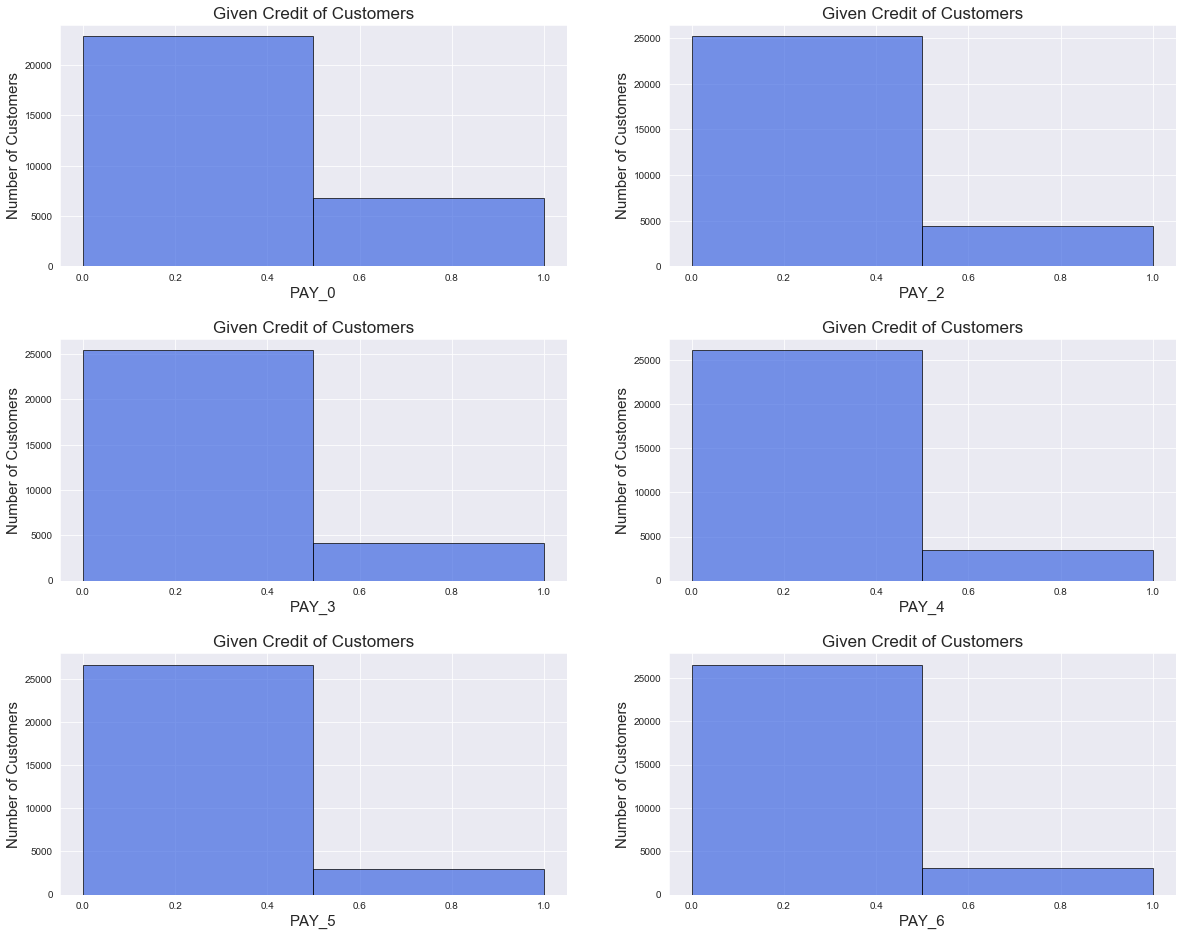

In [39]:
# display(df.describe())
# sns.set_style('darkgrid')
# fig = plt.figure(figsize = (20,16))
# fig.subplots_adjust(hspace = .30)

# axes_sub = [321,322,323,324,325,326]
# pay_cols = df.loc[:,'PAY_0':'PAY_6'].columns
# for sub, col in zip(axes_sub, pay_cols ):
#     ax = fig.add_subplot(sub)
#     col_hist(ax, col, 2, 'royalblue')
    
# # ax1 = fig.add_subplot(321)
# # col_hist(ax1, 'PAY_0', 2, 'royalblue')

# plt.show()

default payment next month      0     1
PAY_0                                  
0                           19658  3184
1                            3342  3421


<Figure size 1440x1152 with 0 Axes>

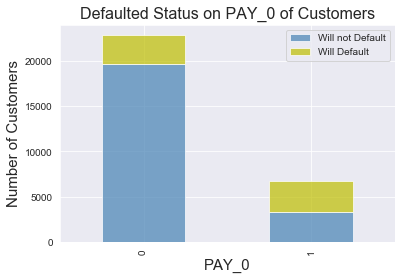

default payment next month      0     1
PAY_2                                  
0                           21059  4133
1                            1941  2472


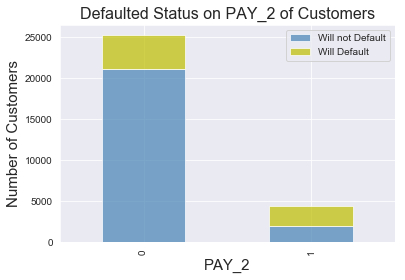

default payment next month      0     1
PAY_3                                  
0                           21003  4408
1                            1997  2197


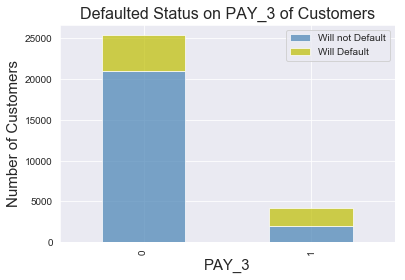

default payment next month      0     1
PAY_4                                  
0                           21381  4730
1                            1619  1875


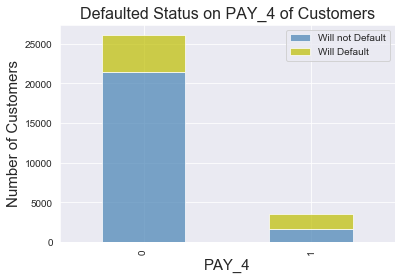

default payment next month      0     1
PAY_5                                  
0                           21690  4957
1                            1310  1648


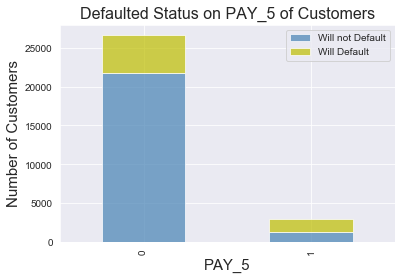

default payment next month      0     1
PAY_6                                  
0                           21542  4995
1                            1458  1610


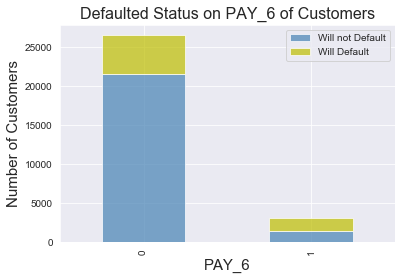

In [48]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

pay_cols = df.loc[:,'PAY_0':'PAY_6'].columns
for col in pay_cols:
    default_vs(col)
    
plt.show()
    

The numbers are all around the same, which means I can't obviously seperate a repayment month from the rest.

## 3. Feature Engineering

## 4. Feature Selection

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## 6. Model Evaluation

## 7. Final Model

## 8. Document in the markdown cells below how you did paired programming.

### How we did paired programming:
- !!!

Additional details on paired programming: